Задача: Buzz in social media, TomsHardware dataset
На вход подаются 96 атрибутов (12 групп, в каждой - подгруппы по времени), зависимая переменная, которую нужно предсказать,- популярность отдельной темы обсуждения (среднее число отображения). Целевая переменная - численное значение, принадлежит R

### Задача 1: загрузка данных, предобработка, матричная/векторная форма, MAE, MSE, RMSE, R^2

In [1]:
import pandas as pd
import numpy as np

1.1 - 1.2 Работа с документом + предобработка

In [2]:
tsh = pd.read_csv('TomsHardware.data', sep=',', header=None)

In [3]:
tsh.columns = ['N' + str(i) for i in range(1, 97)] + ['target']
FeatureColumns = tsh.columns.tolist()
FeatureColumns.remove('target')

tsh.describe()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,N88,N89,N90,N91,N92,N93,N94,N95,N96,target
count,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,...,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000
mean,1.158735,1.137904,1.165442,1.192910,1.187409,1.169310,1.159942,1.080202,0.128991,0.130530,...,0.002378,0.001573,0.001539,0.001593,0.001663,0.001729,0.001762,0.001844,0.001834,3486.441020
std,5.562117,5.352677,5.222078,5.153191,4.983439,4.810775,4.771856,4.495961,0.278037,0.280291,...,0.006957,0.006084,0.005921,0.005867,0.005968,0.006051,0.005992,0.006233,0.006464,12889.952334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,359.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.001699,0.000354,0.000362,0.000462,0.000567,0.000647,0.000683,0.000782,0.000711,1601.250000
max,182.000000,118.000000,118.000000,118.000000,118.000000,118.000000,154.000000,88.000000,1.000000,1.000000,...,0.147081,0.107367,0.130337,0.135633,0.153209,0.153209,0.147003,0.179334,0.187696,265916.500000


In [4]:
'''import seaborn as sns;
import matplotlib.pyplot as plt

sns.pairplot(tsh)
plt.show()'''

'import seaborn as sns;\nimport matplotlib.pyplot as plt\n\nsns.pairplot(tsh)\nplt.show()'

In [5]:
print("Null values: {0}".format(tsh.isnull().values.any()))
print("Count of NaN values: {0}".format(np.sum(tsh.isnull().values)))

Null values: False
Count of NaN values: 0


In [6]:
if len([c for c in tsh.columns if tsh[c].dtype.name == 'object']) != 0:
    print('object types are found')
else:
    print('no object types')


no object types


1.3 Матричная и векторная формы
1.4 Линейная регрессия

In [4]:
from sklearn.linear_model import LinearRegression

In [6]:
FeatureColumns = tsh.columns.tolist()
FeatureColumns.remove('target')

X = tsh[FeatureColumns].values
y = tsh['target'].values
print(type(y))

linreg = LinearRegression()
linreg.fit(X, y)

<class 'numpy.ndarray'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print("Intercept: ", linreg.intercept_)
print("Coefficients: ", linreg.coef_)

lin = linreg.coef_

Intercept:  23.819214793789342
Coefficients:  [ 1.02554150e+02  3.54752767e+01 -1.14352016e+02 -3.20622414e+01
 -5.40727109e+00  5.89106173e+01  1.68697334e+01  2.07032467e+00
 -3.39978038e+02 -1.64779735e+01  1.76481299e+02 -7.60641919e+01
  6.68163734e+01 -7.03730080e+01  1.52168397e+02  1.01573813e+02
 -8.50942063e+01 -2.35051573e+01  4.26048566e+01 -1.55629743e+01
  5.01599263e+01  2.94345801e+01  2.57164976e+01  4.54067606e+01
 -2.53578975e+01 -1.39240643e+02 -1.48656566e+02  2.15739290e+01
  1.71965575e+01  5.60719516e+01 -6.29351944e+01 -1.23552287e+02
  1.33354036e+01 -1.36109437e+01  8.82381256e+00  3.75870809e+00
 -3.43155611e+01  1.49514386e+01 -4.35870710e+00 -3.92824571e+00
  1.17543178e-01  4.41014982e-01  4.23964482e-01 -2.13714147e-01
 -1.90814692e-01 -3.59022758e-02  1.21418390e-01  4.36911256e-01
  4.73086038e+02  4.30692165e+02  2.76266393e+02  1.86177523e+02
 -4.57696226e+02 -3.15033246e+02  1.22649459e+02 -1.02897019e+02
 -6.70121185e-03  1.01695324e+01 -6.93422816

In [10]:
# норма коэффициентов линейной регрессии

norm = np.linalg.norm(linreg.coef_)
print('Coef norm: ', norm)

Coef norm:  1252468.9895121728


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
y_predict = linreg.predict(X)
#print(y_predict)
#print(tsh['target'])

In [13]:
import matplotlib.pyplot as plt

p = linreg.predict(X)
plt.scatter(p,y)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.plot([y.min(), y.max()], [[y.min()], [y.max()]])

1.4 - Метрики по линейной регрессии

In [14]:
test_mae_error = mean_absolute_error(y, y_predict)
test_mse_error = mean_squared_error(y, y_predict)
test_r2_error = r2_score(y, y_predict)
print("MAE : {0}".format(test_mae_error))
print("MSE : {0}".format(test_mse_error))
print("RMSE : {0}".format(np.sqrt(test_mse_error)))
print("R^2 coefficient : {0}".format(test_r2_error))

MAE : 624.73150529996
MSE : 5897197.8049153695
RMSE : 2428.4146690619723
R^2 coefficient : 0.9645057106988817


1.5 Кросс-валидация

In [15]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

In [16]:
MAE_list_scores = []
MSE_list_scores = []
RMSE_list_scores = []
R2_list_scores = []

iteration_index = 0

for train_indexes, test_indexes in kf.split(X,y):
    iteration_index+=1
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    linreg.fit(X_train, y_train)
    intercept=linreg.intercept_
    coefs=linreg.coef_

    y_predict = linreg.predict(X_test)
    
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
    current_rmse = np.sqrt(current_mse)
    current_r2 = r2_score(y_test, y_predict)
    print("Iteration #{0}: MAE : {1}, MSE : {2}, RMSE{3}, R2 : {4}\nIntercepts: {5}\nCoefficients: {6}".format(iteration_index, current_mae, current_mse, current_rmse, current_r2, intercept, coefs))
    MAE_list_scores.append(current_mae)
    MSE_list_scores.append(current_mse)
    RMSE_list_scores.append(current_rmse)
    R2_list_scores.append(current_r2)

print("\nOverall: ")
print("\tMAE : {0}".format(np.mean(MAE_list_scores)))
print("\tMSE : {0}".format(np.mean(MSE_list_scores)))
print("\tRMSE : {0}".format(np.mean(RMSE_list_scores)))
print("\tR^2 coefficient : {0}".format(np.mean(R2_list_scores)))

mse_lin = np.mean(MSE_list_scores)
mae_lin = np.mean(MAE_list_scores)
r2_lin = np.mean(R2_list_scores)

Iteration #1: MAE : 615.5261548530207, MSE : 5657638.474225846, RMSE2378.5790872337725, R2 : 0.9667253703338787
Intercepts: 31.946649762996003
Coefficients: [ 9.41908561e+01  1.74226572e+01 -9.47124759e+01 -7.78780054e+01
  1.21909792e+01  6.79556737e+01  2.05591530e+01  2.08633526e+00
 -2.97593705e+02 -9.85458127e+01  1.70682809e+02 -9.09648546e+01
  6.77772596e+01 -6.89770524e+01  1.78131194e+02  1.20457074e+02
 -7.81109965e+01 -3.36285350e+01  4.77311585e+01  1.03368496e+01
  4.43473746e+00  2.53127705e+01  2.29091394e+01  5.60635622e+01
 -2.06024477e+01 -1.29752202e+02 -1.63879925e+02  2.53375938e+01
  2.81128008e+01  4.36510017e+01 -8.84926134e+01 -1.23158185e+02
  9.25680241e+00 -1.27289983e+01  9.16922613e+00  4.14252664e+00
 -2.78972688e+01  1.30152618e+01 -5.01804321e+00 -2.12927820e+00
  8.26270115e-02  4.71454340e-01  4.55414625e-01 -2.74979502e-01
 -1.50652195e-01 -1.99398613e-02  1.34793334e-01  3.99722791e-01
  4.84275405e+02  6.95671991e+02  2.43348356e+02  1.99604409e+0

In [17]:
test_mse_error < np.mean(MSE_list_scores)

True

#### Задача 2: полиномиальная регрессия

2.1, 2.2 - Полиномиальная регрессия + метрики

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degreeList = []
maeList = []
mseList = []
rmseList = []
r2List = []

kf = KFold(n_splits=3, shuffle=True)

for count, degree in enumerate(range(0,3)):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    MAE_for_current_degree = []
    MSE_for_current_degree = []
    RMSE_for_current_degree = []
    r2_for_current_degree = []
    
    for train_indexes, test_indexes in kf.split(X,y):
        X_train = X[train_indexes]
        y_train = y[train_indexes]
    
        X_test = X[test_indexes]
        y_test = y[test_indexes]
    
        model.fit(X_train, y_train) 
        y_predict = model.predict(X_test)
        
        current_mae = mean_absolute_error(y_test, y_predict)
        current_mse = mean_squared_error(y_test, y_predict)
        current_rmse = np.sqrt(current_mse)
        current_r2 = r2_score(y_test, y_predict)
        
        MAE_for_current_degree.append(current_mae)
        MSE_for_current_degree.append(current_mse)
        RMSE_for_current_degree.append(current_rmse)
        r2_for_current_degree.append(current_r2)
    
    print("Degree: {0}".format(degree))
    print("\tMAE : {0}".format(np.mean(MAE_for_current_degree)))
    print("\tMSE : {0}".format(np.mean(MSE_for_current_degree)))
    print("\tRMSE : {0}".format(np.mean(RMSE_for_current_degree)))
    print("\tR^2 : {0}".format(np.mean(r2_for_current_degree)))
    degreeList.append(degree)
    maeList.append(np.mean(MAE_for_current_degree))
    mseList.append(np.mean(MSE_for_current_degree))
    rmseList.append(np.mean(RMSE_for_current_degree))
    r2List.append(np.mean(r2_for_current_degree))

Degree: 0
	MAE : 4938.547542716825
	MSE : 166146980.85838854
	RMSE : 12889.040106379825
	R^2 : -2.158374857730294e-05
Degree: 1
	MAE : 648.9932578821464
	MSE : 6721479.291369282
	RMSE : 2569.027311571004
	R^2 : 0.9596743126435006
Degree: 2
	MAE : 1488.1113286044128
	MSE : 101838827.28140189
	RMSE : 9997.047294767273
	R^2 : 0.3861369964187666


То есть наиболее оптимальный вариант - степень 1

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

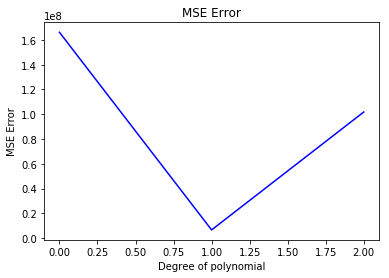

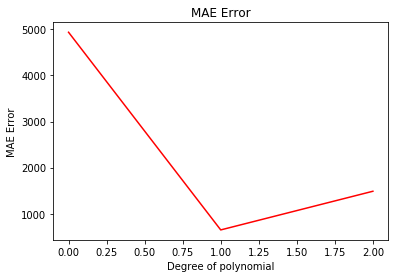

In [20]:
plt.plot(degreeList, mseList, 'b-', label='MSE')
plt.title('MSE Error')
plt.ylabel('MSE Error')
plt.xlabel('Degree of polynomial')
plt.show()

plt.plot(degreeList, maeList, 'r', label='MAE')
plt.title('MAE Error')
plt.ylabel('MAE Error')
plt.xlabel('Degree of polynomial')
plt.show()

In [21]:
model = make_pipeline(PolynomialFeatures(1), LinearRegression())
model.fit(X_train, y_train) 
y_predict = model.predict(X_test)

Коэффициенты при оптимальной степени

In [22]:
print("Coefficients: {0}".format((model.get_params()['linearregression']).coef_))
print("Intercept: {0}".format((model.get_params()['linearregression']).intercept_ ))

lin_poly = (model.get_params()['linearregression']).coef_

Coefficients: [ 3.50923548e-08  9.18752358e+01  4.79872386e+01 -1.20689535e+02
 -4.37275294e+01 -9.57671726e+01  7.93856750e+01  2.04951047e+01
  3.83415458e+01 -2.94042244e+02  5.65143083e+00  1.71098744e+02
  1.75321109e+01  1.31455802e+02 -1.10111207e+02  1.13225122e+02
  4.99297573e+01 -7.31850306e+01 -3.88722834e+01  5.96152614e+01
 -3.47715447e+01  7.42513067e+01  4.51882903e+01  6.55293180e+00
  6.91598183e+01  1.58582428e+01 -1.52512719e+02 -1.53150656e+02
 -9.78132090e-01  2.16874319e+01  4.85410947e+01 -3.41809446e+01
 -1.58120895e+02  1.40146468e+01 -1.22063617e+01  8.89180581e+00
  7.00498668e+00 -3.34163617e+01  1.03514800e+01 -1.12108518e+00
 -4.76806168e+00  1.00533999e-01  4.10243212e-01  4.12767280e-01
 -1.93747851e-01 -1.87546477e-01 -3.80530340e-02  9.61733884e-02
  4.83206366e-01  4.03859844e+02  5.36290255e+02  2.38654189e+02
  4.67655769e+02 -1.32526364e+02 -5.43252329e+02  1.61982520e+02
 -1.79658487e+02 -2.70985976e+00  1.10552443e+01  5.32246750e-01
  2.3428182

In [23]:
# норма вектора полиномиальной регресси от оптимальной степени 1

norm_poly = np.linalg.norm(lin_poly)

print('Polynomial regression norm: ', norm_poly)

Polynomial regression norm:  1312445.372914246


### Задача 3. L1 и L2 регрессии

In [24]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

* l2 без оптимальной степени

In [25]:
model = make_pipeline(Ridge())
kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []
RMSE_list = []
R2_list = []

for train_indexes, test_indexes in kf.split(X,y):
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
    current_rmse = np.sqrt(current_mse)
    current_r2 = r2_score(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
    RMSE_list.append(current_rmse)
    R2_list.append(current_r2)
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))
print("\tRMSE : {0}".format(np.mean(RMSE_list)))
print("\tR^2 : {0}".format(np.mean(R2_list)))

print("Coefficients: {0}".format((model.get_params()['ridge']).coef_))
print("Intercept: {0}".format((model.get_params()['ridge']).intercept_ ))

l2 = (model.get_params()['ridge']).coef_
l2_mse = np.mean(MSE_list)
l2_mae = np.mean(MAE_list)
l2_r2 = np.mean(R2_list)

	MAE : 614.8115117988408
	MSE : 7052885.016880011
	RMSE : 2652.3571083768156
	R^2 : 0.9572305227010066
Coefficients: [ 7.10625461e+01 -5.38838037e+00 -1.60379753e+02 -4.11882381e+01
 -6.80522389e+01  1.65309067e+02 -2.81440976e+01  1.23576687e+02
 -4.30051943e+02  3.42095213e+01  2.69929114e+01 -1.49150128e+02
  1.13003931e+02 -2.08397385e+02  1.79612185e+02 -7.06542319e+01
 -3.08117477e+01 -4.15632351e+01  5.75010329e+01 -2.89647591e+01
  1.10609043e+02 -9.11463985e+01  6.90492399e+01  1.53573020e+01
  1.00571385e+02 -1.13657705e+02 -6.98017385e+01  3.11833492e+01
  1.14557703e+01  1.70377800e+01 -4.50206655e+01 -2.04548073e+02
 -6.82739008e+00 -7.28117275e+00  2.89910432e+00  1.02920393e+01
 -1.24473551e+01 -3.96409696e+00 -3.27751749e+00 -2.20100138e+00
  1.33187543e-01  6.35264491e-01  2.82384256e-01 -2.03239338e-01
 -1.84217153e-01 -3.53953403e-02  1.02173628e-01  4.47567959e-01
  1.19607413e+02  8.21622598e+02  6.24675160e+02  4.03281805e+02
 -5.30305211e+02  3.29323351e+01 -3.13

* l2 с оптимальной степенью

In [26]:
optimalDegree = 1

model = make_pipeline(PolynomialFeatures(1), Ridge())
kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []
RMSE_list = []
R2_list = []

for train_indexes, test_indexes in kf.split(X,y):
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
    current_rmse = np.sqrt(current_mse)
    current_r2 = r2_score(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
    RMSE_list.append(current_rmse)
    R2_list.append(current_r2)
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))
print("\tRMSE : {0}".format(np.mean(RMSE_list)))
print("\tR^2 : {0}".format(np.mean(R2_list)))

print("Coefficients: {0}".format((model.get_params()['ridge']).coef_))
print("Intercept: {0}".format((model.get_params()['ridge']).intercept_ ))

l2_opt = (model.get_params()['ridge']).coef_
l2_mse_opt = np.mean(MSE_list)
l2_mae_opt = np.mean(MAE_list)
l2_r2_opt = np.mean(R2_list)

	MAE : 611.1035232996446
	MSE : 6911949.222444381
	RMSE : 2624.565085747631
	R^2 : 0.9584941352634097
Coefficients: [ 0.00000000e+00  1.40521328e+02 -2.67478509e+01 -2.34666828e+02
 -6.77760451e+01 -6.92700696e+01  2.20933528e+02  5.64737131e+01
  9.66159190e+01 -4.77621210e+02  7.49559030e+01  1.39863302e+02
 -1.84943565e+02  1.68493861e+02 -2.24862820e+02  3.91814372e+01
 -3.07710903e+01 -8.75045613e+01 -2.94491063e+01  5.12405561e+01
 -2.23513460e+00  1.19349446e+02 -7.44470152e+01  7.99935286e+00
  3.22088672e+01  7.11713161e+01 -1.04352984e+02 -8.31863111e+01
  4.84021431e+01  6.65337089e+00  3.09631799e+01 -3.21284266e+01
 -1.86902978e+02 -5.24526055e+00 -7.93405643e+00  3.30958168e+00
  6.60321229e+00 -9.24376148e+00 -5.21718377e+00 -2.77331872e+00
 -3.50880117e+00  1.57925836e-01  5.63062381e-01  3.49244956e-01
 -1.53859168e-01 -2.53613596e-01 -3.47230268e-02  1.12158009e-01
  4.27917046e-01  3.24926927e+02  7.40658678e+02  7.23315069e+02
  2.21186990e+02 -7.64431827e+02 -3.556

* l1 без оптимальной степени

In [27]:
model = make_pipeline(Lasso())
kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []
RMSE_list = []
R2_list = []

for train_indexes, test_indexes in kf.split(X,y):
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
    current_rmse = np.sqrt(current_mse)
    current_r2 = r2_score(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
    RMSE_list.append(current_rmse)
    R2_list.append(current_r2)
    
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))    
print("\tRMSE : {0}".format(np.mean(RMSE_list)))    
print("\tR^2 : {0}".format(np.mean(R2_list)))    



print("Coefficients: {0}".format((model.get_params()['lasso']).coef_))
print("Intercept: {0}".format((model.get_params()['lasso']).intercept_ ))

l1 = (model.get_params()['lasso']).coef_
l1_mse = np.mean(MSE_list)
l1_mae = np.mean(MAE_list)
l1_r2 = np.mean(R2_list)

C:\programs\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\programs\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\programs\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\programs\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

	MAE : 616.2989639291173
	MSE : 7161834.883988092
	RMSE : 2670.823385179351
	R^2 : 0.956398454522785
Coefficients: [ 1.40229071e+02  2.47588439e+01 -1.75881538e+02  2.60880965e+01
 -1.48405442e+02  2.43965407e+02 -1.62093241e+01  3.60527914e+01
 -4.46282788e+02  0.00000000e+00  7.31415357e+01 -2.72449763e+02
  9.82032479e+01 -3.17323768e+02  1.25306313e+02  6.44037990e+01
 -1.12348154e+02 -8.86914613e+01  8.12881134e+01 -7.25187336e+01
  1.69568690e+02 -7.44981920e+01  4.89290758e+01  1.43730641e+01
  1.04437830e+02 -1.06188105e+02 -6.24803712e+01  4.97448806e+01
  2.79381725e+01  4.79184317e+01 -1.90707513e+01 -1.99201315e+02
 -4.12510425e+00 -7.70470131e+00  6.04301014e+00  7.31197806e+00
 -1.16261774e+01 -5.46809876e+00 -1.58777553e+00 -3.45884797e+00
  1.60392651e-01  6.28861525e-01  2.61625410e-01 -1.19975526e-01
 -2.63370698e-01 -5.13794537e-02  9.98488164e-02  4.74834425e-01
  0.00000000e+00  6.40790685e+02  0.00000000e+00  1.50756197e+02
 -0.00000000e+00 -0.00000000e+00  0.0000

C:\programs\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


* l1 с оптимальной степенью

In [28]:
model = make_pipeline(PolynomialFeatures(1), Lasso())
kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []
RMSE_list = []
R2_list = []

for train_indexes, test_indexes in kf.split(X,y):
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
    current_rmse = np.sqrt(current_mse)
    current_r2 = r2_score(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
    RMSE_list.append(current_rmse)
    R2_list.append(current_r2)
    
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))    
print("\tRMSE : {0}".format(np.mean(RMSE_list)))    
print("\tR^2 : {0}".format(np.mean(R2_list)))    



print("Coefficients: {0}".format((model.get_params()['lasso']).coef_))
print("Intercept: {0}".format((model.get_params()['lasso']).intercept_ ))

l1_opt = (model.get_params()['lasso']).coef_
l1_mse_opt = np.mean(MSE_list)
l1_mae_opt = np.mean(MAE_list)
l1_r2_opt = np.mean(R2_list)

C:\programs\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\programs\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\programs\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\programs\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

	MAE : 608.754317479181
	MSE : 6917724.183759848
	RMSE : 2609.128147096485
	R^2 : 0.958397914110841
Coefficients: [ 0.00000000e+00  1.07610065e+02 -5.21252908e+01 -1.74156912e+02
 -5.09106113e+01 -3.09623824e+01  2.01541705e+02  4.00991395e+01
  1.20604885e+02 -2.98138004e+02  9.58982808e+01  1.60715263e+01
 -1.71371780e+02  2.20681343e+01 -2.67093044e+02  1.26332919e+02
 -0.00000000e+00 -8.27850840e+01 -2.14425001e+01  5.77173040e+01
  1.65559259e+01  1.07218352e+02 -5.78352487e+01  1.79756359e+01
  1.53991010e+00  7.58320790e+01 -7.36956924e+01 -5.86951178e+01
  5.23831260e+01  2.65599953e+01  7.63600903e+00 -7.07869338e+01
 -1.73668668e+02 -3.84272955e+00 -9.80179071e+00  5.23578103e+00
  6.64048247e+00 -1.14014979e+01 -5.70783043e+00 -2.58662463e+00
 -2.22827255e+00  9.30622468e-02  5.88898147e-01  3.36750645e-01
 -1.97973965e-01 -1.85327099e-01 -5.48941836e-02  1.27345083e-01
  4.26447067e-01  0.00000000e+00  3.96431438e+02  1.67414690e+02
  0.00000000e+00 -1.74841105e+02 -0.00000

C:\programs\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


###### Сравните и объясните полученные значения MAE, MSE и весовых коэффициентов L1 и L2 регрессии со значениями линейной регрессии.

In [29]:
#MSE
print('mse_lin: ', mse_lin)
print('l1_mse: ', l1_mse)
mse_lin < l1_mse

mse_lin:  6456415.481192624
l1_mse:  7161834.883988092


True

In [30]:
print('mse_lin: ', mse_lin)
print('l2_mse: ', l2_mse)

mse_lin < l2_mse

mse_lin:  6456415.481192624
l2_mse:  7052885.016880011


True

При применении регуляризации средняя квадратичная ошибка становится больше, так как для борьбы с переобучением регуляризация упрощает модель, что дает результаты хуже на тренировочной выборке - то есть модель уже не идеально описывает выборку, а значит, увеличивается ошибка

In [31]:
#MAE

print('mae_lin: ', mae_lin)
print('l1_mae: ', l1_mae)
mae_lin < l1_mae

mae_lin:  640.895379071013
l1_mae:  616.2989639291173


False

In [32]:
print('mae_lin: ', mae_lin)
print('l2_mae: ', l2_mae)
mae_lin < l2_mae

mae_lin:  640.895379071013
l2_mae:  614.8115117988408


False

Средняя абсолютная ошибка при регуляризации получилась меньше, чем без нее. Возможно, это можно объяснить тем, что целевые переменные достаточно разбросаны, и при меньших коэффициентах, получившихся при регуляризации, модель стала лучше описывать меньше по величине переменные (которых может быть больше, хотя это могло ухудшить результат на больших переменных). И так как средняя абсолютная ошибка не сильно штрафует за большие отклонения (в отличие от MSE), при регуляризации она получилась меньше

In [33]:
#отброшенные значения

print('lin: ', lin)
print('l1: ', l1)

zeros = []
for n, i in enumerate(l1):
    if i == 0:
        zeros.append('N' + str(n+1))
print(zeros, len(zeros))

lin:  [ 1.02554150e+02  3.54752767e+01 -1.14352016e+02 -3.20622414e+01
 -5.40727109e+00  5.89106173e+01  1.68697334e+01  2.07032467e+00
 -3.39978038e+02 -1.64779735e+01  1.76481299e+02 -7.60641919e+01
  6.68163734e+01 -7.03730080e+01  1.52168397e+02  1.01573813e+02
 -8.50942063e+01 -2.35051573e+01  4.26048566e+01 -1.55629743e+01
  5.01599263e+01  2.94345801e+01  2.57164976e+01  4.54067606e+01
 -2.53578975e+01 -1.39240643e+02 -1.48656566e+02  2.15739290e+01
  1.71965575e+01  5.60719516e+01 -6.29351944e+01 -1.23552287e+02
  1.33354036e+01 -1.36109437e+01  8.82381256e+00  3.75870809e+00
 -3.43155611e+01  1.49514386e+01 -4.35870710e+00 -3.92824571e+00
  1.17543178e-01  4.41014982e-01  4.23964482e-01 -2.13714147e-01
 -1.90814692e-01 -3.59022758e-02  1.21418390e-01  4.36911256e-01
  4.73086038e+02  4.30692165e+02  2.76266393e+02  1.86177523e+02
 -4.57696226e+02 -3.15033246e+02  1.22649459e+02 -1.02897019e+02
 -6.70121185e-03  1.01695324e+01 -6.93422816e-01  1.83276804e+00
 -9.93712778e+00  1

L1 занулила 20 коэффициентов: 4 коэффициента из категории "разряженность взноса", все коэффициенты "уровень внимания" (и по числу авторов, и по числу взносов), 

Весовые коэффициенты

In [34]:
lin_sum = 0
l1_sum = 0

for i in lin:
    lin_sum+=abs(i)

for k in l1:
    l1_sum += abs(k)
print('lin: ', lin_sum)
print('l1: ', l1_sum)

lin:  3413672.287306027
l1:  4669.956202209962


Таким образом, сумма модулей коэффициентов с регуляризацией L1 намного меньше, чем сумма модулей коэффициентов без регуляризации. То есть регуляризация снизила весы слишком больших коэффициентов, в результате чего уменьшьлась сумма их модулей

In [35]:
print('lin: ', lin)
print('l2: ', l2)

lin:  [ 1.02554150e+02  3.54752767e+01 -1.14352016e+02 -3.20622414e+01
 -5.40727109e+00  5.89106173e+01  1.68697334e+01  2.07032467e+00
 -3.39978038e+02 -1.64779735e+01  1.76481299e+02 -7.60641919e+01
  6.68163734e+01 -7.03730080e+01  1.52168397e+02  1.01573813e+02
 -8.50942063e+01 -2.35051573e+01  4.26048566e+01 -1.55629743e+01
  5.01599263e+01  2.94345801e+01  2.57164976e+01  4.54067606e+01
 -2.53578975e+01 -1.39240643e+02 -1.48656566e+02  2.15739290e+01
  1.71965575e+01  5.60719516e+01 -6.29351944e+01 -1.23552287e+02
  1.33354036e+01 -1.36109437e+01  8.82381256e+00  3.75870809e+00
 -3.43155611e+01  1.49514386e+01 -4.35870710e+00 -3.92824571e+00
  1.17543178e-01  4.41014982e-01  4.23964482e-01 -2.13714147e-01
 -1.90814692e-01 -3.59022758e-02  1.21418390e-01  4.36911256e-01
  4.73086038e+02  4.30692165e+02  2.76266393e+02  1.86177523e+02
 -4.57696226e+02 -3.15033246e+02  1.22649459e+02 -1.02897019e+02
 -6.70121185e-03  1.01695324e+01 -6.93422816e-01  1.83276804e+00
 -9.93712778e+00  1

In [36]:
l2_sum = 0

for k in l2:
    l2_sum += abs(k)
print('lin: ', lin_sum)
print('l2: ', l2_sum)

lin:  3413672.287306027
l2:  96396.11078116519


В случае регуляризации L2 весы некоторых коэффициентов также были уменьшены, но, в отличие от L1, ни одн коэффициент не был занулен, поэтому в данном случае разница между суммой коэффициентов линейной регрессии и суммой коэффицинтов регрессии с регуляризацией L2 оказалась меньше, чем по сравнению с регуляризацией L1. 

###### Сравните и объясните полученные значения MAE, MSE и весовых коэффициентов с результатами, полученными в задаче 3.2 (без оптимизации)

In [37]:
print('l1_MSE: ', l1_mse)
print('l1_MSEopt: ', l1_mse_opt)

print('l2_MAE: ', l1_mae)
print('l1_MAEopt: ', l2_mae_opt)

l1_MSE:  7161834.883988092
l1_MSEopt:  6917724.183759848
l2_MAE:  616.2989639291173
l1_MAEopt:  611.1035232996446


При использовании оптимальной степени ошибки получились меньше, так как выбор оптимальной степени обеспечивает лучшее соответствие данным (без переобучения)

In [38]:
# Весовые коэффициенты при оптимальной степени
l1opt_sum = 0
for k in l1_opt:
    l1opt_sum += abs(k)
print('l1 coef: ', l1_sum)
print('l1opt coef: ', l1opt_sum)

l1 coef:  4669.956202209962
l1opt coef:  3707.61388195096


In [39]:
# Весовые коэффициенты
l2opt_sum = 0
for k in l2_opt:
    l2opt_sum += abs(k)
print('l2 coef: ', l2_sum)
print('l2opt coef: ', l2opt_sum)

l2 coef:  96396.11078116519
l2opt coef:  108396.39681741531


При L1 сумма модулей коэффициентов без оптимизации оказывается выше, чем с оптимизацией. Возможно, ввод оптимизации позволяет занулить большее количество коэффициентов.
При L2, наоборот, сумма модулей коэффициентов бещ оптимизации ниже, чем с оптмизацией, так как оптимизация вводит дополнительные атрибуты, которым присваиваются определенные коэффициенты, что увеличивает сумму. 

* Сравните и объясните полученные значения MSE и весовых коэффициентов L1-регрессии со значениями L2-регрессии
* Что лучше использовать для Вашей задачи: L1 или L2 регрессию?
* Чему равна норма вектора весовых коэффициентов для задачи регрессии? Сравните её с подсчитанными в предыдущих шагах значениями.

In [40]:
#1
print('l1: ',l1_sum)
print('l2: ', l2_sum)

l1:  4669.956202209962
l2:  96396.11078116519


Как было сказано выше, сумма модулей коэфициентов при l1 меньше, чем при l2. Возможно, это связано с тем, что l1 зануляет некоторые коэффициенты, тогда как l1 не игнорирует атрибуты и производит расчеты на всех. Отсюда и разница в значении

In [41]:
print('l1: ', l1_mse)
print('l2: ', l2_mse)

l1:  7161834.883988092
l2:  7052885.016880011


In [42]:
print(l1_r2 > l2_r2)
print(l1_mse < l2_mse)

False
False


#2
По метрикам MSE и R2 L2 дает лучший результат, чем L1, поэтому для данной задачи представляется более логичным использовать L2 

#3
Норма

In [43]:
#для L1 и L2 без оптимальной степени

normL1 = np.linalg.norm(l1)
normL2 = np.linalg.norm(l2)
print('norm L1: ', normL1)
print('norm L2: ', normL2)

norm L1:  1065.543311804529
norm L2:  26009.88959957968


In [44]:
#для L1 и L2 с оптимальной степенью

normL1_opt = np.linalg.norm(l1_opt)
normL2_opt = np.linalg.norm(l2_opt)
print('norm L1 opt: ', normL1_opt)
print('norm L2 opt: ', normL2_opt)

norm L1 opt:  791.2716066095422
norm L2 opt:  28836.13595598617


In [45]:
print(normL1 < normL1_opt)
print(normL2 < normL2_opt)

print(norm_poly < normL1_opt)
print(norm_poly < normL2_opt)

print(norm < normL1)
print(norm < normL2)

False
True
False
False
False
False


Норма вектора при оптимизации меньше, чем норма вектора без оптимизации. Норма вектора при регуляризации меньше, чем норма вектора без регуляризации

#### Задача 4. Подобрать гиперпараметры для L1 и L2 регрессии. 

In [105]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

MAE_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
MSE_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [106]:
n_alphas = 200 # 200 значений
alphas = np.logspace(-10, 2, n_alphas)
alphas

array([1.00000000e-10, 1.14895100e-10, 1.32008840e-10, 1.51671689e-10,
       1.74263339e-10, 2.00220037e-10, 2.30043012e-10, 2.64308149e-10,
       3.03677112e-10, 3.48910121e-10, 4.00880633e-10, 4.60592204e-10,
       5.29197874e-10, 6.08022426e-10, 6.98587975e-10, 8.02643352e-10,
       9.22197882e-10, 1.05956018e-09, 1.21738273e-09, 1.39871310e-09,
       1.60705282e-09, 1.84642494e-09, 2.12145178e-09, 2.43744415e-09,
       2.80050389e-09, 3.21764175e-09, 3.69691271e-09, 4.24757155e-09,
       4.88025158e-09, 5.60716994e-09, 6.44236351e-09, 7.40196000e-09,
       8.50448934e-09, 9.77124154e-09, 1.12266777e-08, 1.28989026e-08,
       1.48202071e-08, 1.70276917e-08, 1.95639834e-08, 2.24780583e-08,
       2.58261876e-08, 2.96730241e-08, 3.40928507e-08, 3.91710149e-08,
       4.50055768e-08, 5.17092024e-08, 5.94113398e-08, 6.82607183e-08,
       7.84282206e-08, 9.01101825e-08, 1.03532184e-07, 1.18953407e-07,
       1.36671636e-07, 1.57029012e-07, 1.80418641e-07, 2.07292178e-07,
      

In [107]:
parameters = {'alpha': alphas, 'fit_intercept' : [True, False]}

In [108]:
clf = GridSearchCV(Ridge(), parameters, scoring  = MSE_scorer)
clf.fit(X, y)

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200072574808375e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954656040723308e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162619793168676e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200072821860599e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954656346352328e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162620027120891e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200073316510832e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954656958291867e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162620495536463e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200074306899187e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954658183508667e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162621433397093e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200076289851989e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.095466063664039e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162623311186414e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200080260116806e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954665548303567e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162627070898308e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200088209390826e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954675382437756e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162634598592443e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200104125429722e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954695072350411e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162649670548928e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.20013599252928e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.095473449550869e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162679847642485e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be acc

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200199796869723e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954813428628801e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.16274026826318e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200327546015959e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954971468781354e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162861242618076e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200583325701819e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0955287897732957e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.163103458189153e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.201095449060628e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0955921455512031e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.163588424936413e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.202120827371107e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0957189979632106e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.164559436193474e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.204173859162819e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0959729877247955e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.166503637979511e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.208284516260353e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0964815494255287e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.170396490640535e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.21651518071463e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0974998852830514e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.17819144780486e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be acc

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.232995846578629e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0995391722394752e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.193801265298091e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.265998379028682e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.1036237345742728e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.225066283913068e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.332096015893578e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.287709408820639e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.836626913068799e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.503944662309875e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.766594679120433e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.450733375900254e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.809073818552793e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.108648675639572e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.740157991879314e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.421878962730278e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.796686116051855e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.307263492936765e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.434154190411635e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.885731603632164e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.058944796335988e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-10, 1.14895e-10, ..., 8.70359e+01, 1.00000e+02]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [109]:
clf.best_params_

{'alpha': 0.00014149912974345758, 'fit_intercept': True}

In [110]:
clf.best_score_

-6224576.254963359

In [111]:
clf.best_estimator_

Ridge(alpha=0.00014149912974345758, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [112]:
# по MSE

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

optimalDegree = 1

model = make_pipeline(PolynomialFeatures(1), clf.best_estimator_)
kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []
RMSE = []
R2 = []

for train_indexes, test_indexes in kf.split(X,y):
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
    current_rmse = np.sqrt(current_mse)
    current_r2 = r2_score(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
    RMSE.append(current_rmse)
    R2.append(current_r2)
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))    
print("\tRMSE : {0}".format(np.mean(RMSE)))    
print("\tR2 : {0}".format(np.mean(R2)))    

mse_mae = np.mean(MAE_list)
mse_mse = np.mean(MSE_list)
mse_rmse = np.mean(RMSE)
mse_r2 = np.mean(R2)
print("Coefficients: {0}".format((model.get_params()['ridge']).coef_))
print("Intercept: {0}".format((model.get_params()['ridge']).intercept_ ))

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.376454493537829e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.510198606776067e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.493911412368412e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

	MAE : 637.2417137770365
	MSE : 6270745.618957919
	RMSE : 2502.472265921432
	R2 : 0.9621373911814883
Coefficients: [ 0.00000000e+00  1.15049401e+02  4.39936476e+01 -1.52919872e+02
 -3.18456189e+01  2.30363637e+00  4.19194174e+01  4.06335765e+01
 -3.37683710e+01 -3.62587654e+02 -1.02274658e+02  1.89983412e+02
 -9.69901999e+01  1.12252498e+02  2.24061902e+00  1.59330404e+02
  1.27655096e+02 -9.14234778e+01 -1.38865993e+01  6.59432241e+01
 -1.82066927e+01  2.61764909e+01  3.99139566e+01  9.70454506e+00
  5.43966911e+01 -2.52462735e+01 -1.43392642e+02 -1.59099917e+02
  2.25004152e+01  2.17246371e+01  5.29208764e+01 -6.33735621e+01
 -1.10470386e+02  1.14617200e+01 -1.05128469e+01  1.24808190e+01
  4.07698960e+00 -3.61589476e+01  1.62335111e+01 -3.96121646e+00
 -4.74206341e+00  1.37573621e-01  4.60775333e-01  4.01215443e-01
 -2.25667932e-01 -1.72306817e-01 -3.98002767e-02  1.18189843e-01
  4.36637550e-01  4.41012655e+02  4.47236506e+02  3.71283701e+02
  2.18728263e+02 -3.29381332e+02 -3.0924

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.5064353745665406e-18 / 1.1102230246251565e-16
  RuntimeWarning)


In [113]:
clf = GridSearchCV(Ridge(), parameters, scoring  = MAE_scorer)
clf.fit(X, y)

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200072574808375e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954656040723308e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162619793168676e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200072821860599e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954656346352328e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162620027120891e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200073316510832e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954656958291867e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162620495536463e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200074306899187e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954658183508667e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162621433397093e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200076289851989e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.095466063664039e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162623311186414e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.200080260116806e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954665548303567e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162627070898308e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954675382437756e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162634598592443e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.713538596053258e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954695072350411e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162649670548928e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.713553436678535e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.095473449550869e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162679847642485e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.713583150586005e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954813428628801e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.16274026826318e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.7136426437953e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accu

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0954971468781354e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.162861242618076e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.713761761189598e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0955287897732957e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.163103458189153e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.714000258365568e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0955921455512031e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.163588424936413e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.714477778591602e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0957189979632106e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.164559436193474e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.715433874178006e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0959729877247955e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.166503637979511e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.717348186805108e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0964815494255287e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.170396490640535e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.721181095203898e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0974998852830514e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.17819144780486e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.728855630537787e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0995391722394752e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.193801265298091e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.744222731808191e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.1036237345742728e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.225066283913068e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.77499535208508e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.287709408820639e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.836626913068799e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.029631167915382e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.503944662309875e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.766594679120433e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.450733375900254e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.809073818552793e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.108648675639572e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.740157991879314e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.421878962730278e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.796686116051855e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.307263492936765e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.434154190411635e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.885731603632164e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.058944796335988e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-10, 1.14895e-10, ..., 8.70359e+01, 1.00000e+02]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_absolute_error, greater_is_better=False),
       verbose=0)

In [114]:
clf.best_params_

{'alpha': 0.020970464013232305, 'fit_intercept': False}

In [115]:
clf.best_score_

-603.6529194376152

In [116]:
clf.best_estimator_

Ridge(alpha=0.020970464013232305, copy_X=True, fit_intercept=False,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [117]:
#для MAE

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

optimalDegree = 1

model = make_pipeline(PolynomialFeatures(1), clf.best_estimator_)
kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []
RMSE = []
R2 = []

for train_indexes, test_indexes in kf.split(X,y):
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
    current_rmse = np.sqrt(current_mse)
    current_r2 = r2_score(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
    RMSE.append(current_rmse)
    R2.append(current_r2)
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))    
print("\tRMSE : {0}".format(np.mean(RMSE)))    
print("\tR2 : {0}".format(np.mean(R2)))    
mae_mae = np.mean(MAE_list)
mae_mse = np.mean(MSE_list)
mae_rmse = np.mean(RMSE)
mae_r2 = np.mean(R2)

print("Coefficients: {0}".format((model.get_params()['ridge']).coef_))
print("Intercept: {0}".format((model.get_params()['ridge']).intercept_ ))

	MAE : 602.4530844416008
	MSE : 6446768.0149651375
	RMSE : 2537.1233350903385
	R2 : 0.9609540963482255
Coefficients: [ 3.45553381e+01  7.96091352e+01  3.04639307e+00 -1.91112391e+02
 -1.67080458e+01  4.92970159e+01  1.16757458e+02  3.74520709e+01
  4.26246356e+01 -3.39354872e+02  2.72489521e+01  1.85250303e+02
 -1.43359872e+02 -4.12588332e+01 -1.44802891e+02  1.04195665e+02
  1.37444023e+02 -4.83032949e+01 -1.61211751e+01  5.86733953e+01
 -3.14561663e+01  5.35414880e+01 -3.93817442e+01  9.42655153e+00
  5.43542987e+01  4.30527941e+01 -1.25120954e+02 -1.32346953e+02
  3.31993137e+01  1.03072377e+01  3.86936647e+01 -6.72207373e+01
 -1.63041231e+02 -3.90744887e+00 -1.02248853e+01  5.05611091e+00
  7.02308041e+00 -1.75401429e+01 -4.42266947e-01 -2.96924008e+00
  2.09687084e+00  1.34632267e-01  4.38133184e-01  3.93660936e-01
 -2.27503654e-01 -1.98102210e-01 -4.42620733e-02  1.47198113e-01
  4.43935930e-01  1.40962391e+02  6.22161601e+02  5.60195592e+02
  2.38125678e+02 -5.58696958e+02 -1.41

In [118]:
print("MSE:")
print('mae: ', mse_mae)
print('mse: ', mse_mse)
print('rmse: ', mse_rmse)
print('r2: ', mse_r2, '\n')

print("MAE:")
print('mae: ', mae_mae)
print('mse: ', mae_mse)
print('rmse: ', mae_rmse)
print('r2: ', mae_r2)

MSE:
mae:  637.2417137770365
mse:  6270745.618957919
rmse:  2502.472265921432
r2:  0.9621373911814883 

MAE:
mae:  602.4530844416008
mse:  6446768.0149651375
rmse:  2537.1233350903385
r2:  0.9609540963482255


В первом случае - оптимизация по MSE, то есть подбирается такое альфа, который минимизирует MSE (возможно в ущерб другим метрикам). Во втором случае - оптимизация проводится по MAE. 
Судя по параметру R2, настройка по MSE дает лучший результат. Это может быть связано с тем, что во входных данных есть сильный разброс, а MSE чувствителен к выбросам, что позволяет настроить модель на них.

### Задача 4.2 Подбор гиперпараметров для L1 или L2 полиномиальной регрессии (со значением степени полученной из задачи 2). Получить значения метрик MAE, MSE, RMSE и весовых коэффициентов для оптимального параметра. Объяснить полученные результаты.

In [119]:
model

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=0.020970464013232305, copy_X=True, fit_intercept=False,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001))])

In [120]:
parameters = {'ridge__alpha': alphas, 'ridge__fit_intercept' : [True, False]}

In [121]:
clf = GridSearchCV(model, parameters, scoring  = MSE_scorer)
clf.fit(X, y)

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.702182261462844e-24 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.04873921669777e-24 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.567443829979208e-24 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be acc

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.412510700429968e-24 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.106387165056613e-24 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.142737362815581e-24 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.484133168048788e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.6230611395957435e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.4301191403610426e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be 

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9715319808911235e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.249693617178022e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.863385074571462e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.949602437002109e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.506537768600568e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.733070660958178e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.1912296211520528e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.30273923395242e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.147875620901548e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3850803903883783e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.608344978598285e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2982769949671244e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be 

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.775408844445669e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.222429285972798e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.601611053858381e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.561325363920549e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0456349858155333e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.213347362985953e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9143689198691504e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.0935707573832445e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8446967515836613e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.832950163154212e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.191748148854968e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6934525219078075e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.674334241817968e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.392719702194704e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.39503201264702e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be acc

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.536555487240501e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.6803906508278218e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.4806335845310017e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be 

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.0764919678682066e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.364478785882896e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.964525113470612e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.159753361953384e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.736360676060383e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.9355732844475e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accu

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.2333060471595363e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.348754385029198e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.188420703705943e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4693258261852324e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.70047653119336e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.379456374833378e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.944085087321897e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.406895114834606e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.764148438410352e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.89904900012379e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0825687409289714e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.538779774769844e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9819879588668538e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.1675195356039153e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9098548411711153e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.968337028177226e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.3398084201037025e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.823912073106601e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.945405873305994e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.689166032340038e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.65623817456414e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be acc

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.5908294593758988e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.7397451460718568e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.532932291982099e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be 

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1851593350576094e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.483318378329429e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.069237604974674e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.112245092833312e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.672599875043982e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0578040646232931e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=0.020970464013232305, copy_X=True, fit_intercept=False,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': array([1.00000e-10, 1.14895e-10, ..., 8.70359e+01, 1.00000e+02]), 'ridge__fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [122]:
clf.best_params_

{'ridge__alpha': 0.00014149912974345758, 'ridge__fit_intercept': False}

In [123]:
clf.best_score_

-6224576.254961145

In [127]:
#MSE

kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []
RMSE_list = []
R2_list = []
model = clf.best_estimator_

for train_indexes, test_indexes in kf.split(X,y):
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    new_model.fit(X_train, y_train) 
    y_predict = new_model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
    current_rmse = np.sqrt(current_mse)
    current_r2 = r2_score(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
    RMSE_list.append(current_rmse)
    R2_list.append(current_r2)
    
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))
print("\tRMSE : {0}".format(np.mean(RMSE_list)))    
print("\tR2 : {0}".format(np.mean(R2_list)))    

mse_mae_opt = np.mean(MAE_list)
mse_mse_opt = np.mean(MSE_list)
mse_rmse_opt = np.mean(RMSE_list)
mse_r2_opt = np.mean(R2_list)

print("Coefficients: {0}".format((new_model.get_params()['ridge']).coef_))
print("Intercept: {0}".format((new_model.get_params()['ridge']).intercept_ ))



	MAE : 605.9536063134525
	MSE : 6637184.547063885
	RMSE : 2560.602486272532
	R2 : 0.9603316446548457
Coefficients: [ 2.09439551e+01  8.96082164e+01  4.35152247e+01 -1.74064549e+02
 -6.59998695e+00 -4.67853318e+01  1.35420177e+02  6.27886787e+00
  2.50655922e+01 -4.65596467e+02 -4.46056116e+01  1.74277467e+02
 -1.25096111e+02  1.21893022e+02 -1.44999167e+02  1.62612327e+02
  1.34954425e+02 -4.27712094e+01 -4.11195886e+01  4.81450116e+01
 -4.77142095e+01  9.71589823e+01 -4.69920903e+01  4.07784202e+01
  5.55022667e+01  5.69571593e+01 -1.28866143e+02 -1.29342721e+02
  6.61904536e+00  1.47660273e+01  4.82123883e+01 -3.35706416e+01
 -2.10075826e+02 -4.29658603e+00 -1.32421414e+01  3.41552307e+00
  6.98095691e+00 -1.76691190e+01  2.51356986e+00 -5.09195810e+00
  5.82982326e+00  1.42378753e-01  5.39295082e-01  3.81918806e-01
 -2.23648776e-01 -2.17831978e-01 -3.69319054e-02  1.34265438e-01
  4.20553044e-01  8.73334752e+01  6.29129468e+02  6.86815201e+02
  2.40353701e+02 -4.69286852e+02 -6.4925

In [126]:
clf = GridSearchCV(model, parameters, scoring  = MAE_scorer)
clf.fit(X, y)

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.702182261462844e-24 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.04873921669777e-24 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.567443829979208e-24 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be acc

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.412510700429968e-24 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.106387165056613e-24 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.142737362815581e-24 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.484133168048788e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.6230611395957435e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.4301191403610426e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be 

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.9715319808911235e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.249693617178022e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.863385074571462e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.949602437002109e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.506537768600568e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.733070660958178e-23 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.1912296211520528e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.30273923395242e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.147875620901548e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.3850803903883783e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.608344978598285e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2982769949671244e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be 

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.775408844445669e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.222429285972798e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.601611053858381e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.561325363920549e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0456349858155333e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.213347362985953e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9143689198691504e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.0935707573832445e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8446967515836613e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.832950163154212e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.191748148854968e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6934525219078075e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.674334241817968e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.392719702194704e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.39503201264702e-21 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be acc

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.536555487240501e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.6803906508278218e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.4806335845310017e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be 

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.0764919678682066e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.364478785882896e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.964525113470612e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.159753361953384e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 6.736360676060383e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.9355732844475e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accu

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.2333060471595363e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.348754385029198e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.188420703705943e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4693258261852324e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.70047653119336e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.379456374833378e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.944085087321897e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.406895114834606e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.764148438410352e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.89904900012379e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0825687409289714e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.538779774769844e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be ac

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9819879588668538e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.1675195356039153e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9098548411711153e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.968337028177226e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.3398084201037025e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.823912073106601e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.945405873305994e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.689166032340038e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.65623817456414e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be acc

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.5908294593758988e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.7397451460718568e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.532932291982099e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be 

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.1851593350576094e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.483318378329429e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.069237604974674e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.112245092833312e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.672599875043982e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0578040646232931e-16 / 1.1102230246251565e-16
  RuntimeWarning)
C:\programs\anaconda\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be a

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=0.00014149912974345758, copy_X=True, fit_intercept=False,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': array([1.00000e-10, 1.14895e-10, ..., 8.70359e+01, 1.00000e+02]), 'ridge__fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_absolute_error, greater_is_better=False),
       verbose=0)

In [128]:
clf.best_params_

{'ridge__alpha': 0.020970464013232305, 'ridge__fit_intercept': False}

In [129]:
clf.best_score_

-607.7055743878191

In [130]:
#MAE

kf = KFold(n_splits=5, shuffle=True)

MAE_list = []
MSE_list = []
RMSE_list = []
R2_list = []
model = clf.best_estimator_
print(model)

for train_indexes, test_indexes in kf.split(X,y):
    X_train = X[train_indexes]
    y_train = y[train_indexes]
    
    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    new_model.fit(X_train, y_train) 
    y_predict = new_model.predict(X_test)
        
    current_mae = mean_absolute_error(y_test, y_predict)
    current_mse = mean_squared_error(y_test, y_predict)
    current_rmse = np.sqrt(current_mse)
    current_r2 = r2_score(y_test, y_predict)
        
    MAE_list.append(current_mae)
    MSE_list.append(current_mse)
    RMSE_list.append(current_rmse)
    R2_list.append(current_r2)
    
print("\tMAE : {0}".format(np.mean(MAE_list)))
print("\tMSE : {0}".format(np.mean(MSE_list)))
print("\tRMSE : {0}".format(np.mean(RMSE_list)))    
print("\tR2 : {0}".format(np.mean(R2_list)))    


mae_mae_opt = np.mean(MAE_list)
mae_mse_opt = np.mean(MSE_list)
mae_rmse_opt = np.mean(RMSE_list)
mae_r2_opt = np.mean(R2_list)

print("Coefficients: {0}".format((new_model.get_params()['ridge']).coef_))
print("Intercept: {0}".format((new_model.get_params()['ridge']).intercept_ ))


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=0.020970464013232305, copy_X=True, fit_intercept=False,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001))])
	MAE : 607.0117088848117
	MSE : 6629363.14711784
	RMSE : 2567.851106832534
	R2 : 0.9595096436928211
Coefficients: [ 1.86824176e+01  9.31948048e+01  2.38837853e+00 -1.71034911e+02
 -1.87030625e+01 -4.24828190e+01  1.50729485e+02  3.73825170e+01
 -5.07893388e+00 -2.96051000e+02  2.13708731e+01  1.34567530e+02
 -1.74775313e+02  8.42911148e+01 -1.59606312e+02  9.27533706e+01
  1.87893797e+02 -4.58967587e+01 -2.96875111e+01  7.45850462e+01
 -1.83157351e+01  8.68633933e+01 -3.89859870e+01  1.45071422e+01
  6.33330077e+01  1.46265466e+01 -1.52584643e+02 -9.70977517e+01
  6.54875755e+00  1.97663974e+01  2.61890067e+01 -4.05706418e+01
 -1.98758306e+02 -3.78073120e+00 -1.52250595e+01  2.75603639e+00
  7.72

In [131]:
print("MSE opt:")
print('mae opt: ', mse_mae_opt)
print('mse opt: ', mse_mse_opt)
print('rmse opt: ', mse_rmse_opt)
print('r2 opt: ', mse_r2_opt, '\n')

print("MAE opt:")
print('mae opt: ', mae_mae_opt)
print('mse opt: ', mae_mse_opt)
print('rmse opt: ', mae_rmse_opt)
print('r2 opt: ', mae_r2_opt)

MSE opt:
mae opt:  605.9536063134525
mse opt:  6637184.547063885
rmse opt:  2560.602486272532
r2 opt:  0.9603316446548457 

MAE opt:
mae opt:  607.0117088848117
mse opt:  6629363.14711784
rmse opt:  2567.851106832534
r2 opt:  0.9595096436928211


В первом случае - оптимизация по MSE. Во втором случае - оптимизация проводится по MAE.
При MSE результаты метрик лучше, возможно, потому, что во входных данных присутствуют выбросы, и настройка по этому параметру позволяет настроить модель на выбросы.

In [132]:
print("MSE:")
print('mae: ', mse_mae)
print('mse: ', mse_mse)
print('rmse: ', mse_rmse)
print('r2: ', mse_r2, '\n')

print("MAE:")
print('mae: ', mae_mae)
print('mse: ', mae_mse)
print('rmse: ', mae_rmse)
print('r2: ', mae_r2)

MSE:
mae:  637.2417137770365
mse:  6270745.618957919
rmse:  2502.472265921432
r2:  0.9621373911814883 

MAE:
mae:  602.4530844416008
mse:  6446768.0149651375
rmse:  2537.1233350903385
r2:  0.9609540963482255


Результат при MSE также лучше, хотя и ненамного.

In [133]:
print("MSE opt:")
print('mae opt: ', mse_mae_opt)
print('mse opt: ', mse_mse_opt)
print('rmse opt: ', mse_rmse_opt)
print('r2 opt: ', mse_r2_opt, '\n')

print("MAE opt:")
print('mae opt: ', mae_mae_opt)
print('mse opt: ', mae_mse_opt)
print('rmse opt: ', mae_rmse_opt)
print('r2 opt: ', mae_r2_opt)

MSE opt:
mae opt:  605.9536063134525
mse opt:  6637184.547063885
rmse opt:  2560.602486272532
r2 opt:  0.9603316446548457 

MAE opt:
mae opt:  607.0117088848117
mse opt:  6629363.14711784
rmse opt:  2567.851106832534
r2 opt:  0.9595096436928211


In [134]:
print(mse_mae < mse_mae_opt) #false

print(mse_mse < mse_mse_opt) #true
print(mse_rmse < mse_rmse_opt) #true

print(mse_r2 < mse_r2_opt) #false

print(mae_mae < mae_mae_opt) #true
print(mae_mse < mae_mse_opt) #true
print(mae_rmse < mae_rmse_opt)#true

print(mae_r2 < mae_r2_opt) #false

False
True
True
False
True
True
True
False


По метрикам, гиперпараметры, подобранные для функции без оптимизации, оказываются лучше, чем с оптимизацией (r2 выше, большая часть ошибок - ниже)